In [1]:
import os
import csv
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
%matplotlib inline

In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [3]:
import sys
sys.path.append("/home/weixin/Documents/MyProjects/CNN_KERAS/utilities")

In [4]:
from DnCNN import DnCNN as DnCNN, DnCNN_dc
from DnCNN_no_residual import DnCNN as DnCNN_NR
from RDN import RDN

In [5]:
from keras.models import load_model

In [6]:
import glob
from skimage.measure import compare_psnr, compare_ssim
from skimage.io import imread, imsave
import numpy as np

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
##############################################  trained model ##############################################

In [9]:
s_model_1 = DnCNN(depth=10,filters=32,image_shape=(None,None,1),use_bnorm=True)
s_model_2 = DnCNN(depth=5,filters=64,image_shape=(None,None,1),use_bnorm=True)

s_model_3 = DnCNN_dc(depth=8,filters=32,image_shape=(None,None,1),use_bnorm=True)
s_model_4 = DnCNN_dc(depth=10,filters=32,image_shape=(None,None,1),use_bnorm=True)

s_model_5 = DnCNN_dc(depth=5,filters=16,image_shape=(None,None,1),use_bnorm=True)
s_model_6 = DnCNN_dc(depth=5,filters=32,image_shape=(None,None,1),use_bnorm=True)


model_1 = DnCNN(depth=17,filters=64,image_shape=(None,None,1),use_bnorm=True)
model_2 = DnCNN_NR(depth=17,filters=64,image_shape=(None,None,1),use_bnorm=True)
model_3 = RDN(block_num=4,filters=45,image_shape=(None,None,1),growth_rate=4)
model_4 = DnCNN(depth=17,filters=64,image_shape=(None,None,1),use_bnorm=True)

In [10]:
# from keras.utils import plot_model
# plot_model(model_1, to_file='model.png')

In [11]:
model_1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input0 (InputLayer)             (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 640         input0[0][0]                     
__________________________________________________________________________________________________
relu2 (Activation)              (None, None, None, 6 0           conv1[0][0]                      
__________________________________________________________________________________________________
conv3 (Conv2D)                  (None, None, None, 6 36864       relu2[0][0]                      
__________________________________________________________________________________________________
bn4 (Batch

In [12]:
s_model_1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input0 (InputLayer)             (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 3 320         input0[0][0]                     
__________________________________________________________________________________________________
relu2 (Activation)              (None, None, None, 3 0           conv1[0][0]                      
__________________________________________________________________________________________________
conv3 (Conv2D)                  (None, None, None, 3 9216        relu2[0][0]                      
__________________________________________________________________________________________________
bn4 (Batch

In [13]:
# model_3.summary()

In [26]:
s_model_1_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_mean_squared_error_10_32_1_video_128/"
s_model_2_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_mean_squared_error_5_64_1_video_128/"

s_model_3_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_dc_mean_squared_error_8_32_1_video_128/"
s_model_4_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_dc_mean_squared_error_10_32_1_video_128/"

s_model_5_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_dc_mean_squared_error_5_16_1_video_128/"
s_model_6_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_dc_mean_squared_error_5_32_1_video_128/"

model_1_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_17_64_1_video_128"
model_2_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_non_residual_17_64_1_video_128/"
model_3_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/RDN_4_45_4_1_denoise_25_128"
model_4_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/models/DnCNN_mean_squared_error_17_64_1_video_128/"

In [15]:
s_model_1.load_weights(os.path.join(s_model_1_save_dir,"model_150.hdf5"), by_name=True)
s_model_2.load_weights(os.path.join(s_model_2_save_dir,"model_150.hdf5"), by_name=True)

s_model_3.load_weights(os.path.join(s_model_3_save_dir,"model_150.hdf5"), by_name=True)
s_model_4.load_weights(os.path.join(s_model_4_save_dir,"model_150.hdf5"), by_name=True)

s_model_5.load_weights(os.path.join(s_model_5_save_dir,"model_150.hdf5"), by_name=True)
# s_model_6.load_weights(os.path.join(s_model_6_save_dir,"model_150.hdf5"), by_name=True)

model_1.load_weights(os.path.join(model_1_save_dir,"model_150.hdf5"), by_name=True)
model_2.load_weights(os.path.join(model_2_save_dir,"model_150.hdf5"), by_name=True)
model_3.load_weights(os.path.join(model_3_save_dir,"model_150.hdf5"), by_name=True)
model_4.load_weights(os.path.join(model_4_save_dir,"model_150.hdf5"), by_name=True)

In [ ]:
##############################################  convergence ##############################################

In [ ]:
def get_loss(file):
    csvFile = open(file, "r")
    reader = csv.reader(csvFile)
    train_loss = []
    validate_loss = []
    for line in reader:
        if reader.line_num == 1:
            continue
        train_loss.append(float(line[1]))
        if len(line) >2:
            validate_loss.append(float(line[2]))
        else:
            validate_loss.append(float(-1))
    csvFile.close()
    return np.array(train_loss),np.array(validate_loss)

In [ ]:
filename = "log.csv"
file_1 = os.path.join(model_1_save_dir,filename)
model_1_train_loss, model_1_vali_loss = get_loss(file_1)

file_2 = os.path.join(model_2_save_dir,filename)
model_2_train_loss, model_2_vali_loss = get_loss(file_2)

file_3 = os.path.join(model_3_save_dir,filename)
model_3_train_loss, model_3_vali_loss = get_loss(file_3)

file_4 = os.path.join(model_4_save_dir,filename)
model_4_train_loss, model_4_vali_loss = get_loss(file_4)

file_5 = os.path.join(s_model_1_save_dir,filename)
model_5_train_loss, model_5_vali_loss = get_loss(file_5)

file_6 = os.path.join(s_model_2_save_dir,filename)
model_6_train_loss, model_6_vali_loss = get_loss(file_6)

In [ ]:
plt.figure(figsize=(20,10))
start_point = 0

plt.subplot(1,2,1)
plt.plot(model_5_train_loss[start_point:])#/model_1_train_loss[start_point])
plt.plot(model_5_vali_loss[start_point:])#/model_1_vali_loss[start_point])
plt.legend(('train_loss',  'vali_loss'),
           shadow=False, loc='best', handlelength=1.5, fontsize=16)

# plt.plot(model_1_train_loss[start_point:])
# plt.plot(model_2_train_loss[start_point:])
# plt.plot(model_3_train_loss[start_point:])
# plt.legend(('train_loss_1',  'train_loss_2','train_loss_3'),
#            shadow=False, loc='best', handlelength=1.5, fontsize=16)
plt.xlabel("EPOCHS")
plt.ylabel("loss")
plt.subplot(1,2,2)
plt.plot(model_6_train_loss[start_point:])#/model_1_train_loss[start_point])
plt.plot(model_6_vali_loss[start_point:])#/model_1_vali_loss[start_point])
plt.legend(('train_loss',  'vali_loss'),
           shadow=False, loc='best', handlelength=1.5, fontsize=16)


# plt.plot(model_1_vali_loss[start_point:])
# plt.plot(model_2_vali_loss[start_point:])
# plt.plot(model_3_vali_loss[start_point:])
# plt.legend(('vali_loss_1',  'vali_loss_2', 'vali_loss_3'),
#            shadow=False, loc='best', handlelength=1.5, fontsize=16)
# plt.plot(model_3_vali_loss)
# plt.subplot(1,2,1)
# plt.plot((model_1_train_loss[start_point:]),'r-*')
# plt.plot((model_1_train_loss[start_point:]/model_1_train_loss[start_point]),'r-*')
# plt.plot((model_1_vali_loss[start_point:]/model_1_vali_loss[start_point]),'r--')
# plt.subplot(1,2,2)
# plt.plot((model_2_train_loss[start_point:]),'g-')
# plt.plot((model_2_train_loss[start_point:]/model_2_train_loss[start_point]),'g-')
# plt.plot((model_2_vali_loss[start_point:]/model_2_vali_loss[start_point]),'g--')
# plt.legend(('train_loss_1', 'vali_loss_1', 'train_loss_2',"vali_loss_2"),
#            shadow=False, loc='best', handlelength=1.5, fontsize=16)
plt.xlabel("EPOCHS")
plt.ylabel("loss")

In [16]:
##############################################  test dataset 1 ##############################################

In [17]:
from video_datagenerator import gen_train_data, gen_validate_data
val_x,val_y = gen_validate_data(data_dir="/data/nfs_training_pairs/", verbose=False)
print(len(val_x))

^_^-validation data finished-^_^
20240


In [39]:
image_index = 8765
noisy_image = val_x[image_index,:,:,0]
inpt = np.reshape(noisy_image,(1,*noisy_image.shape,1))
clean_image = val_y[image_index,:,:,0]
clean_image = clean_image.astype("float32")
noisy_image = noisy_image.astype("float32")
# print(np.max(clean_image),np.min(clean_image))
# print(np.max(noisy_image),np.min(noisy_image))


In [27]:
#### model: DnCNN with Dilated conv, depth=5, filters=32

0.978404654371 26


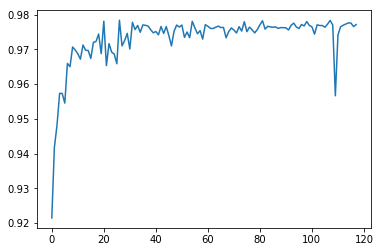

36.9654310634 54


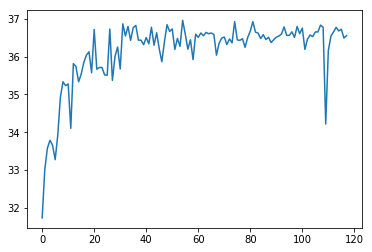

In [28]:
ssim = []
psnr = []
for i in range(1,119):
    s_model_6.load_weights(os.path.join(s_model_6_save_dir,"model_%03d.hdf5" % (i)), by_name=True)
    predict = s_model_6.predict(inpt)
    predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
    ssim.append(compare_ssim(clean_image,predict)) 
    psnr.append(compare_psnr(clean_image,predict))
    
plt.plot(ssim)
print(np.max(ssim),np.argmax(ssim))
plt.show()

plt.plot(psnr)
print(np.max(psnr),np.argmax(psnr))
plt.show()

psnr= 39.4892591151 ,ssim= 0.987936436713


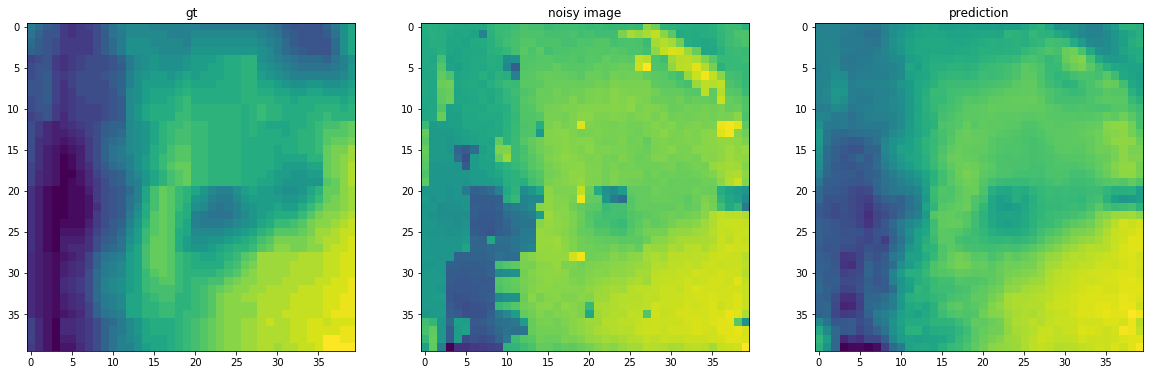

In [40]:
i=120
s_model_6.load_weights(os.path.join(s_model_6_save_dir,"model_%03d.hdf5" % (i)), by_name=True)
predict = s_model_6.predict(inpt)
predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
# print(np.max(predict),np.min(predict))
# print(predict.dtype)
# print(clean_image.dtype)

ssim = compare_ssim(clean_image,predict)
psnr = compare_psnr(clean_image,predict)
print("psnr=",psnr,",ssim=",ssim)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(clean_image)
plt.title("gt")
plt.subplot(1,3,2)
plt.imshow(noisy_image)
plt.title("noisy image")
plt.subplot(1,3,3)
plt.imshow(predict)
plt.title("prediction")

In [19]:
#### model: DnCNN with Dilated conv, depth=5, filters=16

0.975120075683 28


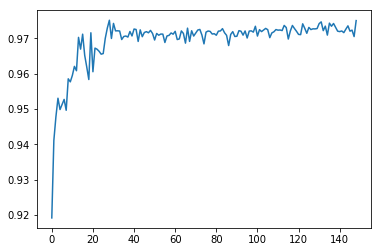

35.9694159153 131


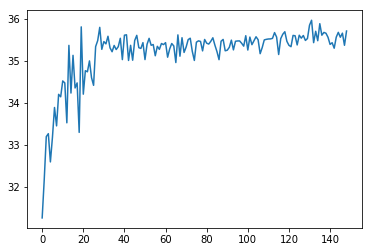

In [21]:
ssim = []
psnr = []
for i in range(1,150):
    s_model_5.load_weights(os.path.join(s_model_5_save_dir,"model_%03d.hdf5" % (i)), by_name=True)
    predict = s_model_5.predict(inpt)
    predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
    ssim.append(compare_ssim(clean_image,predict)) 
    psnr.append(compare_psnr(clean_image,predict))
    
plt.plot(ssim)
print(np.max(ssim),np.argmax(ssim))
plt.show()

plt.plot(psnr)
print(np.max(psnr),np.argmax(psnr))
plt.show()

psnr= 37.4900977959 ,ssim= 0.980822048032


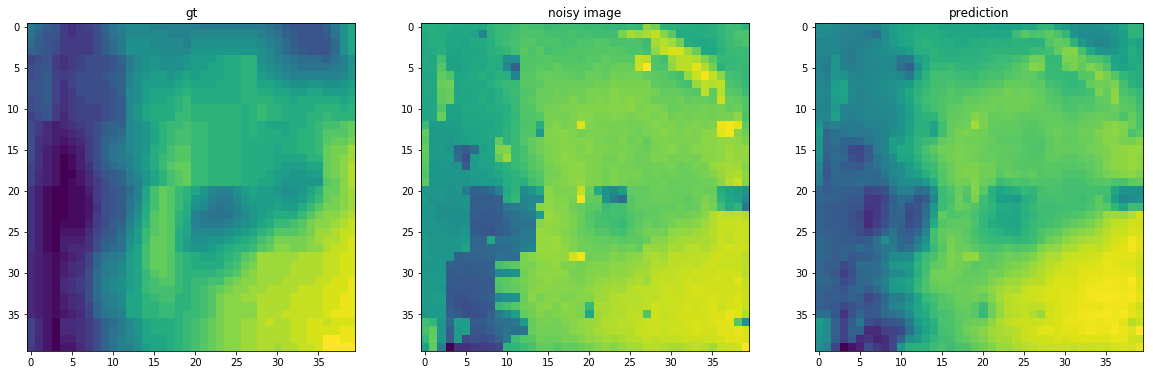

In [41]:
i=150
s_model_5.load_weights(os.path.join(s_model_5_save_dir,"model_%03d.hdf5" % (i)), by_name=True)
predict = s_model_5.predict(inpt)
predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
# print(np.max(predict),np.min(predict))
# print(predict.dtype)
# print(clean_image.dtype)

ssim = compare_ssim(clean_image,predict)
psnr = compare_psnr(clean_image,predict)
print("psnr=",psnr,",ssim=",ssim)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(clean_image)
plt.title("gt")
plt.subplot(1,3,2)
plt.imshow(noisy_image)
plt.title("noisy image")
plt.subplot(1,3,3)
plt.imshow(predict)
plt.title("prediction")

In [ ]:
#### model: DnCNN with Dilated conv, depth=8, filters=32

In [ ]:
ssim = []
psnr = []
for i in range(1,150):
    s_model_3.load_weights(os.path.join(s_model_3_save_dir,"model_%03d.hdf5" % (i)), by_name=True)
    predict = s_model_3.predict(inpt)
    predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
    ssim.append(compare_ssim(clean_image,predict)) 
    psnr.append(compare_psnr(clean_image,predict))
    
plt.plot(ssim)
print(np.max(ssim),np.argmax(ssim))
plt.show()

plt.plot(psnr)
print(np.max(psnr),np.argmax(psnr))
plt.show()

psnr= 41.5453822591 ,ssim= 0.991414607229


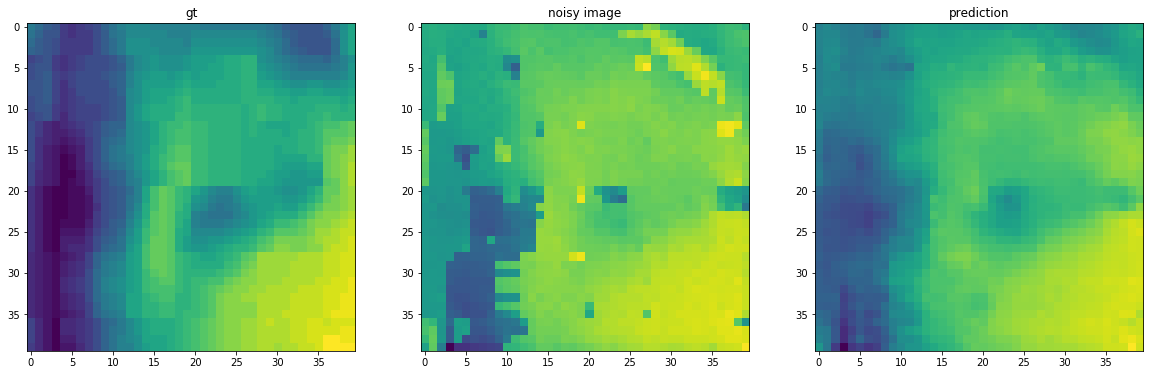

In [42]:
i=150
s_model_3.load_weights(os.path.join(s_model_3_save_dir,"model_%03d.hdf5" % (i)), by_name=True)
predict = s_model_3.predict(inpt)
predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
# print(np.max(predict),np.min(predict))
# print(predict.dtype)
# print(clean_image.dtype)

ssim = compare_ssim(clean_image,predict)
psnr = compare_psnr(clean_image,predict)
print("psnr=",psnr,",ssim=",ssim)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(clean_image)
plt.title("gt")
plt.subplot(1,3,2)
plt.imshow(noisy_image)
plt.title("noisy image")
plt.subplot(1,3,3)
plt.imshow(predict)
plt.title("prediction")

In [ ]:
#### model: DnCNN with Dilated conv, depth=10, filters=32

In [ ]:
ssim = []
psnr = []
for i in range(1,150):
    s_model_4.load_weights(os.path.join(s_model_4_save_dir,"model_%03d.hdf5" % (i)), by_name=True)
    predict = s_model_4.predict(inpt)
    predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
    ssim.append(compare_ssim(clean_image,predict)) 
    psnr.append(compare_psnr(clean_image,predict))
    
plt.plot(ssim)
print(np.max(ssim),np.argmax(ssim))
plt.show()

plt.plot(psnr)
print(np.max(psnr),np.argmax(psnr))
plt.show()

psnr= 41.0361942823 ,ssim= 0.991269258037


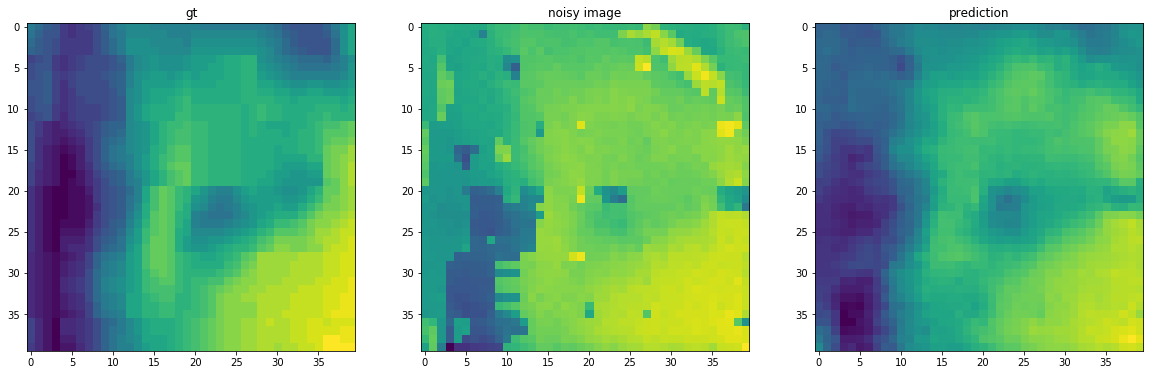

In [43]:
i=150
s_model_4.load_weights(os.path.join(s_model_4_save_dir,"model_%03d.hdf5" % (i)), by_name=True)
predict = s_model_4.predict(inpt)
predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
# print(np.max(predict),np.min(predict))
# print(predict.dtype)
# print(clean_image.dtype)

ssim = compare_ssim(clean_image,predict)
psnr = compare_psnr(clean_image,predict)
print("psnr=",psnr,",ssim=",ssim)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(clean_image)
plt.title("gt")
plt.subplot(1,3,2)
plt.imshow(noisy_image)
plt.title("noisy image")
plt.subplot(1,3,3)
plt.imshow(predict)
plt.title("prediction")

In [ ]:
#### model: DnCNN, depth=17, filters=64

In [ ]:
ssim = []
psnr = []
for i in range(1,150):
    model_1.load_weights(os.path.join(model_1_save_dir,"model_%03d.hdf5" % (i)), by_name=True)
    predict = model_1.predict(inpt)
    predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
    ssim.append(compare_ssim(clean_image,predict)) 
    psnr.append(compare_psnr(clean_image,predict))
plt.plot(ssim)
print(np.max(ssim),np.argmax(ssim))
plt.show()

plt.plot(psnr)
print(np.max(psnr),np.argmax(psnr))
plt.show()

psnr= 41.9275567994 ,ssim= 0.992017154


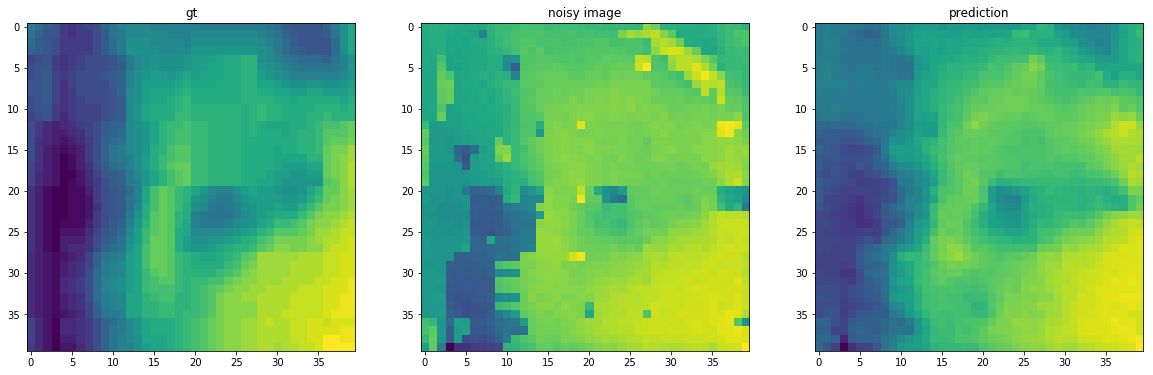

In [44]:
i=150
model_1.load_weights(os.path.join(model_1_save_dir,"model_%03d.hdf5" % (i)), by_name=True)
predict = model_1.predict(inpt)
predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
# print(np.max(predict),np.min(predict))
# print(predict.dtype)
# print(clean_image.dtype)

ssim = compare_ssim(clean_image,predict)
psnr = compare_psnr(clean_image,predict)
print("psnr=",psnr,",ssim=",ssim)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(clean_image)
plt.title("gt")
plt.subplot(1,3,2)
plt.imshow(noisy_image)
plt.title("noisy image")
plt.subplot(1,3,3)
plt.imshow(predict)
plt.title("prediction")

In [ ]:
#### model: DnCNN w/o dialated conv, depth=10, filters=32

In [ ]:
ssim = []
psnr = []
for i in range(1,150):
    s_model_1.load_weights(os.path.join(s_model_1_save_dir,"model_%03d.hdf5" % (i)), by_name=True)
    predict = s_model_1.predict(inpt)
    predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
    ssim.append(compare_ssim(clean_image,predict)) 
    psnr.append(compare_psnr(clean_image,predict))
plt.plot(ssim)
print(np.max(ssim),np.argmax(ssim))
plt.show()

plt.plot(psnr)
print(np.max(psnr),np.argmax(psnr))
plt.show()
    

In [ ]:
import time
print('test image shape',inpt.shape)
b = time.time()
for i in range(10000):
    tmp = model_1.predict(inpt)
print('time for more parameters',(time.time()-b)/10000)
b = time.time()
for i in range(10000):
    tmp = s_model_1.predict(inpt)
print('time for less parameters',(time.time()-b)/10000)

psnr= 39.1753876992 ,ssim= 0.988357379341


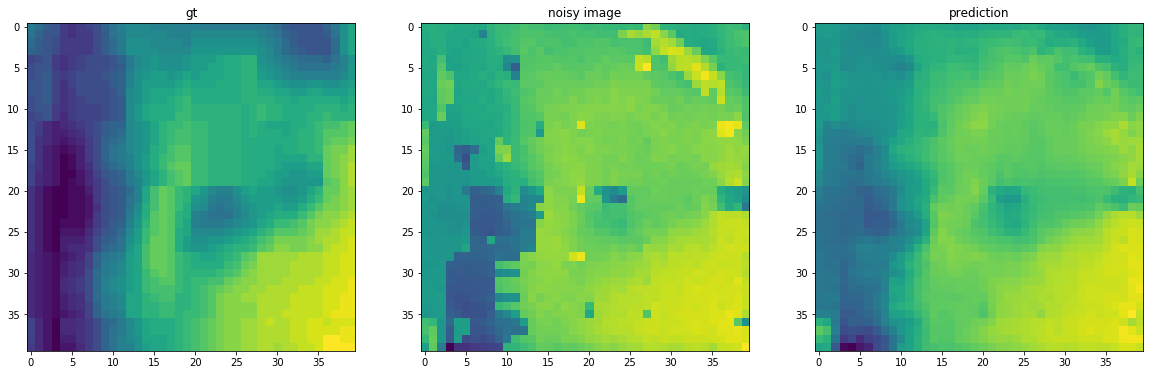

In [45]:
i = 150
s_model_1.load_weights(os.path.join(s_model_1_save_dir,"model_%03d.hdf5" % (i)), by_name=True)
predict = s_model_1.predict(inpt)
predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
# print(np.max(predict),np.min(predict))
# print(predict.dtype)
# print(clean_image.dtype)

ssim = compare_ssim(clean_image,predict)
psnr = compare_psnr(clean_image,predict)
print("psnr=",psnr,",ssim=",ssim)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(clean_image)
plt.title("gt")
plt.subplot(1,3,2)
plt.imshow(noisy_image)
plt.title("noisy image")
plt.subplot(1,3,3)
plt.imshow(predict)
plt.title("prediction")

In [ ]:
#### model: DnCNN w/o dialated conv, depth=5, filters=64

In [ ]:
ssim = []
psnr = []
for i in range(1,150):
    s_model_2.load_weights(os.path.join(s_model_2_save_dir,"model_%03d.hdf5" % (i)), by_name=True)
    predict = s_model_2.predict(inpt)
    predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
    ssim.append(compare_ssim(clean_image,predict)) 
    psnr.append(compare_psnr(clean_image,predict))
plt.plot(ssim)
print(np.max(ssim),np.argmax(ssim))
plt.show()

plt.plot(psnr)
print(np.max(psnr),np.argmax(psnr))
plt.show()

psnr= 38.8252145705 ,ssim= 0.984314884556


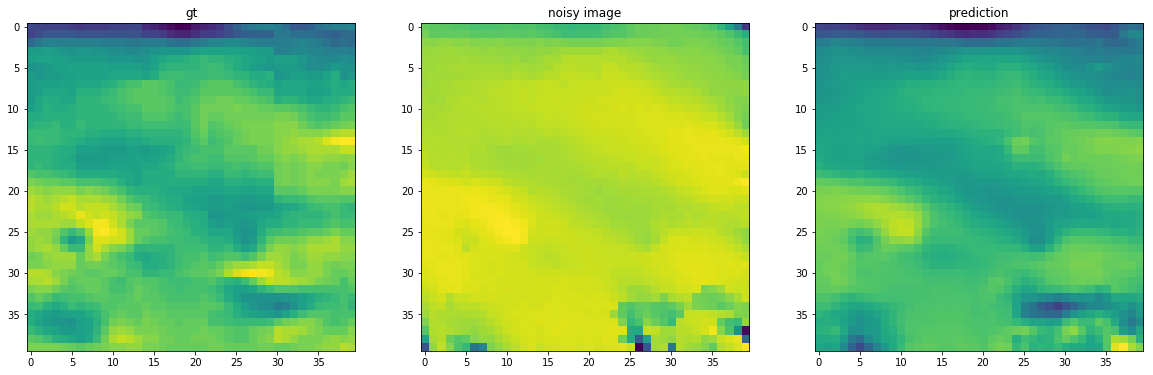

In [38]:
i = 150
s_model_2.load_weights(os.path.join(s_model_2_save_dir,"model_%03d.hdf5" % (i)), by_name=True)
predict = s_model_2.predict(inpt)
predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))
# print(np.max(predict),np.min(predict))
# print(predict.dtype)
# print(clean_image.dtype)

ssim = compare_ssim(clean_image,predict)
psnr = compare_psnr(clean_image,predict)
print("psnr=",psnr,",ssim=",ssim)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(clean_image)
plt.title("gt")
plt.subplot(1,3,2)
plt.imshow(noisy_image)
plt.title("noisy image")
plt.subplot(1,3,3)
plt.imshow(predict)
plt.title("prediction")

In [ ]:
predict = model_2.predict(inpt)
predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))

ssim = compare_ssim(clean_image,predict)
psnr = compare_psnr(clean_image,predict)
print("psnr=",psnr,",ssim=",ssim)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(clean_image)
plt.title("gt")
plt.subplot(1,3,2)
plt.imshow(noisy_image)
plt.title("noisy image")
plt.subplot(1,3,3)
plt.imshow(predict)
plt.title("prediction")

In [ ]:
predict = model_3.predict(inpt)
predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))

ssim = compare_ssim(clean_image,predict)
psnr = compare_psnr(clean_image,predict)
print("psnr=",psnr,",ssim=",ssim)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(clean_image)
plt.title("gt")
plt.subplot(1,3,2)
plt.imshow(noisy_image)
plt.title("noisy image")
plt.subplot(1,3,3)
plt.imshow(predict)
plt.title("prediction")

In [ ]:
predict = model_4.predict(inpt)
predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))

ssim = compare_ssim(clean_image,predict)
psnr = compare_psnr(clean_image,predict)
print("psnr=",psnr,",ssim=",ssim)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(clean_image)
plt.title("gt")
plt.subplot(1,3,2)
plt.imshow(noisy_image)
plt.title("noisy image")
plt.subplot(1,3,3)
plt.imshow(predict)
plt.title("prediction")

In [ ]:
# max_num = 180
# ssim_history = np.zeros((max_num,1))
# psnr_history = np.zeros((max_num,1))
# model = model_1
# model_save_dir = model_1_save_dir
# for i in range(1,max_num):
#     if i <10:
#         model_name = "00"+str(i)
#     elif i < 100:
#         model_name = "0"+str(i)
#     else:
#         model_name = str(i)
#     model.load_weights(os.path.join(model_save_dir,"model_"+model_name+".hdf5"), by_name=True)
#     predict = model.predict(inpt)
#     predict = np.reshape(predict,(inpt.shape[1],inpt.shape[2]))

#     ssim_history[i] = compare_ssim(clean_image,predict)
#     psnr_history[i] = compare_psnr(clean_image,predict)

In [ ]:
# plt.plot(ssim_history[1:])

In [ ]:
# plt.plot(psnr_history[1:])

In [ ]:
#################################################################################################################

In [ ]:
# mymodel = RDN(block_num=4,filters=45,image_shape=(None,None,1),growth_rate=4)
# mymodel.summary()

In [ ]:
# import scipy.misc
# fig_save_dir = "/home/weixin/Documents/MyProjects/CNN_KERAS/fig"

# fig_name = "clean_image_"+str(image_index)+".png"
# scipy.misc.toimage(clean_image, cmin=np.min(predict), cmax=np.max(clean_image)).save(os.path.join(fig_save_dir,fig_name))

# fig_name = "noisy_image_"+str(image_index)+".png"
# scipy.misc.toimage(noisy_image, cmin=np.min(noisy_image), cmax=np.max(noisy_image)).save(os.path.join(fig_save_dir,fig_name))


# fig_name = "predict_image_"+str(image_index)+".png"
# scipy.misc.toimage(predict, cmin=np.min(predict), cmax=np.max(predict)).save(os.path.join(fig_save_dir,fig_name))




In [ ]:
i = 1
f = "model_%03d" %(i)
print(f)

In [ ]:
377/1.1/429

In [46]:
################################### results comparison ##############################

In [ ]:
#### model: DnCNN with Dilated conv, depth=5, filters=16

In [ ]:
#### model: DnCNN with Dilated conv, depth=5, filters=32

In [ ]:
#### model: DnCNN with Dilated conv, depth=8, filters=32

In [ ]:
#### model: DnCNN with Dilated conv, depth=10, filters=32